Enter Keyword/Tag to search about: gdg delhi
Enter how many tweets to search: 100
How people are reacting on gdg delhi by analyzing 100 Tweets
Neutral


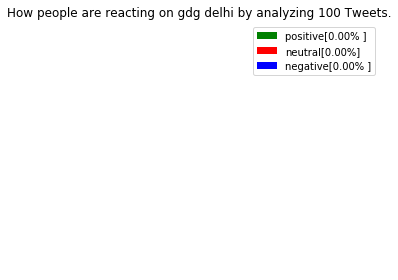

In [9]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt
 
    
#This is the function to calculate the percentage    
def percentage(part, whole):
    return 100 * float(part)/float(whole)

#Connection for the twitter API
consumerKey = 'tkDJ3Xbn6mio5mDUELphZHHhd'
consumerSecret = '9n9lcHhtZQ74Vl5CuOFe71apu8Qq9AQH7vlzTU8k55hcwwZLiw'
accessToken = '784456173697150976-4ThUEH3ziqAtKGSgBcYUz0oEbfStnqG'
accessTokenSecret = 'DD3ltOHLVopp3eVgEtNKY6d70aNJ7v7tamacdyLfEbOfL'
    
# create an object so that we can use the API
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

#This is for the keyword/tag we want to search and how many tweets we want to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

#Here,the search tweets stored in tweets variable   
tweets = tweepy.Cursor(api.search, q=searchTerm, lang="English").items(NoOfTerms)

#Three variable which will store polarity so we can calculate the avg of positive negative and neutral   
positive = 0
negative = 0
neutral = 0
#This is avg result of search tweets
polarity = 0

for tweet in tweets:
    #print (tweet.text)   #print tweet's text
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity==0):
        neutral +=1
        
    elif(analysis.sentiment.polarity<0.00):
        negative +=1
        
    elif(analysis.sentiment.polarity>0.00):
        positive +=1
        
#For calculate the percentage        
positive = percentage(positive, NoOfTerms )
negative = percentage(negative, NoOfTerms ) 
neutral = percentage(neutral, NoOfTerms ) 

#For percentage, percentage will contain how many decimal point 
positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')

#For printout the result
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " Tweets")
if(polarity ==0):
    print("Neutral")

if(polarity < 0):
    print("Negative")

if(polarity > 0):
    print("positive")

#For print in pie chart    
labels = ['positive['+str(positive)+'% ]', 'neutral['+str(neutral)+'%]', 'negative['+str(negative)+'% ]']  
sizes = [positive, neutral, negative]
colors = ['green','red','blue']

patches, texts = plt.pie(sizes, colors=colors, startangle=90)

plt.legend(patches, labels, loc="best")
plt.title("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " Tweets.")

plt.axis('equal')
plt.tight_layout()
plt.show()

